In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Mon, 23 Aug 2021 16:06


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [10]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"25,640,998","29,678,252","4,037,254",15.75%
Collector,"4,301,620","4,517,367","215,747",5.02%
Freeway,"28,356,427","34,490,182","6,133,755",21.63%
Ramp,"753,376","748,989","-4,387",-0.58%
Total,"59,052,421","69,434,790","10,382,369",17.58%


----
### Daily | By County

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,196,640","36,136,065","4,939,425",15.83%
Kitsap,"4,564,315","4,925,692","361,377",7.92%
Pierce,"13,907,563","16,730,699","2,823,136",20.30%
Snohomish,"9,383,903","11,642,334","2,258,431",24.07%
Total,"59,052,421","69,434,790","10,382,369",17.58%


----
### Daily | Scatterplots 

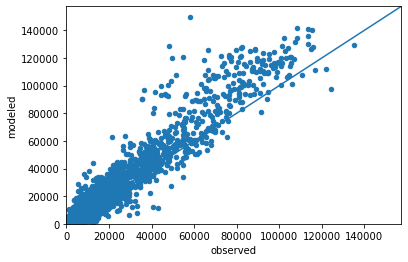

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.955609048973543


---
By County

King r^2: 0.9635839009597396
Kitsap r^2: 0.9615402884037896
Pierce r^2: 0.9430360724095658
Snohomish r^2: 0.941853200453887


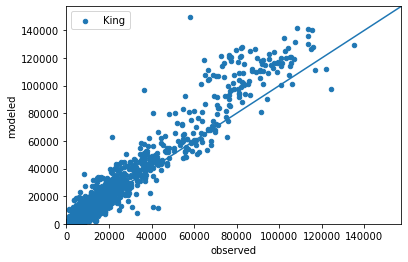

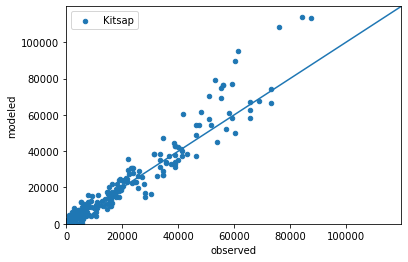

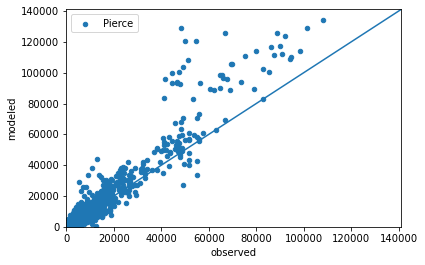

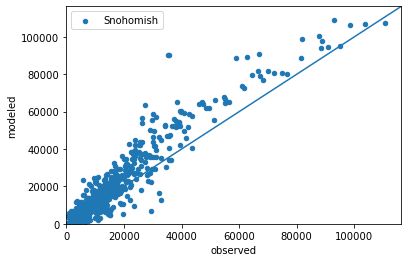

In [14]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.8917884164723223
r^2 Arterial: 0.8721345535982211


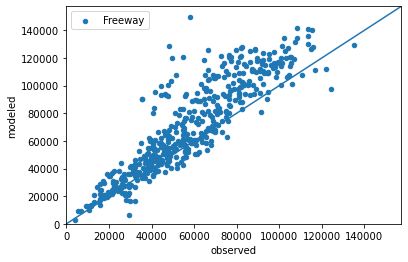

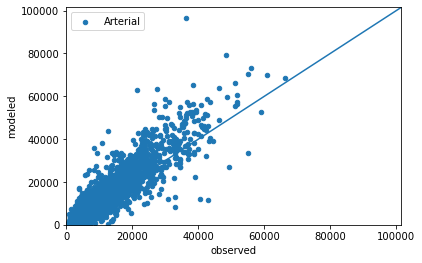

In [15]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9040352446340767


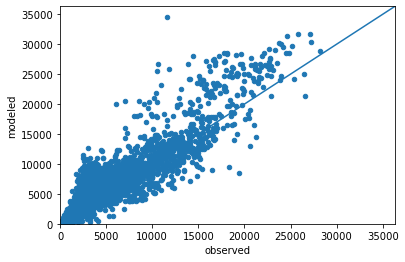

In [16]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","675,665",King,"107,248",18.87%
1,KENT,"550,322","575,591",King,"25,269",4.59%
2,SEATTLE - SOUTH OF CBD,"526,500","563,336",King,"36,836",7.00%
3,SHIP CANAL,"519,802","602,840",King,"83,038",15.97%
4,KIRKLAND-REDMOND,"414,120","483,599",King,"69,479",16.78%
5,MILL CREEK,"400,848","488,769",King,"87,921",21.93%
6,SOUTH BELLEVUE,"399,500","440,904",King,"41,404",10.36%
7,SEATTLE - NORTH,"372,000","414,374",King,"42,374",11.39%
8,TACOMA - EAST OF CBD,"312,164","410,992",Pierce,"98,828",31.66%
9,PARKLAND,"304,322","348,545",Pierce,"44,223",14.53%


r^2 : 0.9904521906754638


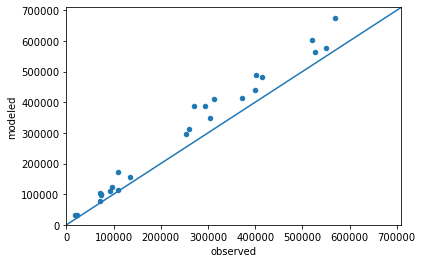

In [18]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [19]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff


----
### Key Routes
#### Ferries

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff


In [22]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,0,Ballard-Pier 50 Fast,"13,019"


#### Rail

In [24]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff


In [25]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [26]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff


In [27]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

In [28]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
        lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [29]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","18,478","9,062",96.25%
Westlake,"10,904","48,794","37,890",347.50%
University St,"5,257","34,088","28,831",548.41%
Pioneer Square,"3,865","31,951","28,086",726.67%
Int'l District,"5,647","47,803","42,156",746.46%
Capitol Hill,"7,016","26,012","18,996",270.74%
Stadium,"1,912","3,734","1,822",95.26%
SODO,"2,108","18,299","16,191",768.26%
Beacon Hill,"2,587","4,965","2,378",91.90%


Sound Transit Station Groupings

In [30]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","18,478","9,062",96.25%
Capitol Hill,"7,016","26,012","18,996",270.74%
Westlake/University St,"16,161","82,882","66,721",412.85%
Pioneer Square/Int'l District,"9,512","79,754","70,241",738.42%
Stadium/SODO,"4,020","22,033","18,013",448.09%
Beacon Hill/Mount Baker,"4,809","9,671","4,862",101.09%
Columbia City,"2,376","3,586","1,210",50.94%
Othello/Rainier Beach,"4,412","10,030","5,618",127.33%
Tukwila Int'l Blvd,"2,779","10,140","7,361",264.88%


# Stop Transfers

### Light Rail

In [31]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.94,-99.00,99.94,-100.95%
Westlake,0.08,0.36,-0.28,-76.75%
University St,0.07,0.20,-0.13,-65.40%
Pioneer Square,0.21,0.16,0.05,30.20%
Int'l District,0.71,0.45,0.26,58.51%
Capitol Hill,0.29,-99.00,99.29,-100.29%
Stadium,0.18,0.12,0.06,47.16%
SODO,0.63,0.31,0.32,101.42%
Beacon Hill,0.55,0.35,0.19,54.44%


# Externals

In [32]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","196,725","66,725",51.33%
I-5 to Mount Vernon,3744,Snohomish,"67,000","84,612","17,612",26.29%
I-90 @ Snoqualmie Pass,3739,King,"33,000","42,764","9,764",29.59%
SR-532 to Camano Island,3746,Snohomish,"23,000","26,764","3,764",16.37%
SR-507 to Yelm,3734,Pierce,"23,000","28,698","5,698",24.77%
SR-3 to Belfair,3749,Kitsap,"18,000","24,192","6,192",34.40%
Hood Canal Bridge,3748,Kitsap,"18,000","23,334","5,334",29.63%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","10,994","1,894",20.82%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","9,063","2,763",43.86%


# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

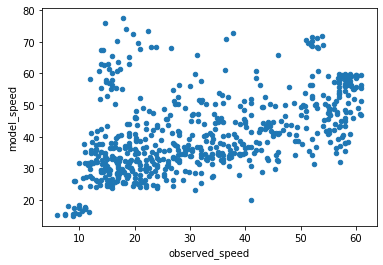

In [33]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

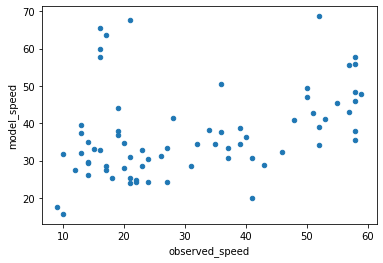

In [34]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [35]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,36,58
15,Everett to Seattle - SB,24,27
24,Tacoma to Seattle - NB,24,24
33,Seattle to Tacoma - SB,38,58
42,Bellevue to Lynnwood - NB,43,57
51,Lynnwood to Bellevue - SB,24,22
60,Tukwila to Bellevue - NB,28,20
69,Bellevue to Tukwila - SB,29,43
78,Auburn to Renton - NB,25,22
87,Renton to Auburn - SB,46,55


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

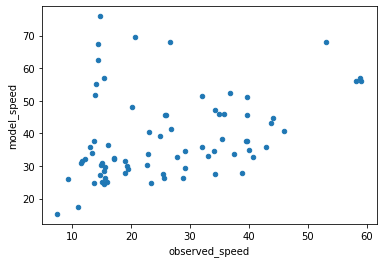

In [36]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [37]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,25,23
10,Everett to Seattle - SB,33,28
19,Tacoma to Seattle - NB,36,43
28,Seattle to Tacoma - SB,27,25
37,Bellevue to Lynnwood - NB,26,26
46,Lynnwood to Bellevue - SB,38,40
55,Tukwila to Bellevue - NB,29,29
64,Bellevue to Tukwila - SB,28,19
73,Auburn to Renton - NB,43,44
82,Renton to Auburn - SB,27,34
